In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

1. Crei un dataframe Pandas contenente le informazioni presenti nella collection

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/wtitze/4E/main/ristoranti.csv')
df

,N,address,borough,cuisine,grades,name,restaurant_id
0,0,"{'building': '8825', 'coord': [-73.8803827, 40...",Queens,American,"[{'date': datetime.datetime(2014, 11, 15, 0, 0...",Brunos On The Boulevard,40356151
1,1,"{'building': '156-71', 'coord': [-73.840437, 4...",Queens,Pizza/Italian,"[{'date': datetime.datetime(2014, 10, 29, 0, 0...",New Park Pizzeria & Restaurant,40364744
2,2,"{'building': '6409', 'coord': [-74.00528899999...",Brooklyn,American,"[{'date': datetime.datetime(2014, 7, 18, 0, 0)...",Regina Caterers,40356649
3,3,"{'building': '2491', 'coord': [-74.1459332, 40...",Staten Island,Delicatessen,"[{'date': datetime.datetime(2015, 1, 9, 0, 0),...",Bagels N Buns,40363427
4,4,"{'building': '56', 'coord': [-74.004758, 40.74...",Manhattan,American,"[{'date': datetime.datetime(2014, 6, 10, 0, 0)...",Old Homestead,40364715
...,...,...,...,...,...,...,...
25354,25354,"{'building': 'ONE', 'coord': [-81.664363600000...",Queens,Other,[],Camden Food Express,50018316
25355,25355,"{'building': '700', 'coord': [-73.988230600000...",Manhattan,Other,[],Wooly'S Nyc,50018495
25356,25356,"{'building': '2144', 'coord': [-73.9552561, 40...",Manhattan,Other,[],Rafi 786,50018553
25357,25357,"{'building': '1448', 'coord': [-73.93032629999...",Brooklyn,Other,[],NaN,50018721


2. Elimini tutte le colonne ad esclusione di ‘borough’, ‘cuisine’ e ‘name’

In [ ]:
df1 = df.drop(columns=['N','address','grades','restaurant_id'])
df1

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


3. Conti il numero di ristoranti che hanno ‘Missing’ come quartiere

In [ ]:
df[df['borough']=='Missing'].count()

N                51
address          51
borough          51
cuisine          51
grades           51
name             51
restaurant_id    51
dtype: int64

Sostituisca alla parola ‘Missing’ il valore null

In [ ]:
df1 = df.replace('Missing',np.nan)
df1[df1['borough'].isnull()].count()


N                51
address          51
borough           0
cuisine          51
grades           51
name             51
restaurant_id    51
dtype: int64

5. Elimini dal dataframe tutti i ristoranti di cui non si conosce il quartiere

In [ ]:
df2 = df1['borough'].dropna()
df2

0               Queens
1               Queens
2             Brooklyn
3        Staten Island
4            Manhattan
             ...      
25354           Queens
25355        Manhattan
25356        Manhattan
25357         Brooklyn
25358        Manhattan
Name: borough, Length: 25308, dtype: object

6. Calcoli il numero di ristoranti per ogni cucina. Ordinare in ordine decrescente a partire dal tipo di cucina
che ha più ristoranti

In [ ]:
df.groupby('cuisine')['name'].count().sort_values( ascending=False)

cuisine
American           6183
Chinese            2418
Café/Coffee/Tea    1214
Pizza              1163
Italian            1069
                   ... 
Iranian               2
Chilean               1
Californian           1
Polynesian            1
Creole/Cajun          1
Name: name, Length: 85, dtype: int64

7. Visualizzi il tipo di cucina con più ristoranti

In [ ]:
df.groupby('cuisine')['name'].count().sort_values( ascending=False).head(1)

cuisine
American    6183
Name: name, dtype: int64

8. Visualizzi un grafico a barre con i primi 10 tipi di cucina

<BarContainer object of 10 artists>

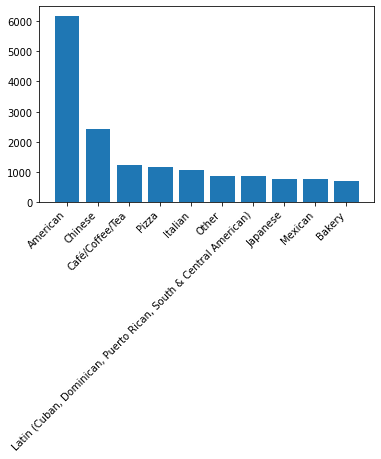

In [ ]:
df1 = df.groupby('cuisine',as_index=False)['name'].count().sort_values( 'name',ascending=False).head(10)
fig = plt.figure()
ax = plt.axes()
fig.autofmt_xdate(rotation = 45)
ax.bar(df1['cuisine'],df1['name'].values)

9. Calcoli il numero di ristoranti per ogni quartiere

In [ ]:
torta= df.groupby('borough',as_index=False).count()
torta

,borough,N,address,cuisine,grades,name,restaurant_id
0,Bronx,2338,2338,2338,2338,2322,2338
1,Brooklyn,6086,6086,6086,6086,6046,6086
2,Manhattan,10259,10259,10259,10259,10211,10259
3,Missing,51,51,51,51,51,51
4,Queens,5656,5656,5656,5656,5615,5656
5,Staten Island,969,969,969,969,963,969


10. Visualizzi i dati precedenti in un grafico a torta

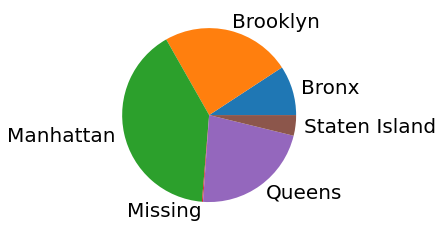

In [ ]:
plt.rcParams.update({'font.size':20})
fig = plt.figure()
ax = plt.axes()
ax.pie(torta['N'],labels=torta['borough'])
plt.show()

11. Visualizzi i due grafici affiancati. Dare titoli appropriati ad entrambi i grafici.